# Comparando, Tratando e Mesclando DataFrames

## Objetivo

Vamos modificar os IDs para os nomes dos produtos, dos clientes e das lojas, para nossas análises ficarem mais intuitivas futuramente. Para isso, vamos criar um data frame com todos os detalhes.

- Usaremos o método merge para isso e, depois se quisermos, podemos pegar apenas as colunas que queremos do dataframe final.

### Criando nossos dataframes

In [38]:
import pandas as pd

#às vezes precisaremos mudar o encoding. Possiveis valores para testar:
#encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'
vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';')
produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';',encoding='ISO-8859-1')
clientes_df = pd.read_csv(r'Contoso - Clientes.csv', sep=';',encoding='ISO-8859-1')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv', sep=';',encoding='ISO-8859-1')



#usaremos o display para ver todos os dataframes
display(vendas_df)
display(clientes_df)
display(lojas_df)
display(produtos_df)


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


,ÿID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995,NaN,NaN,NaN,NaN
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943,NaN,NaN,NaN,NaN
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989,NaN,NaN,NaN,NaN
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998,NaN,NaN,NaN,NaN
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980,NaN,NaN,NaN,NaN
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001,NaN,NaN,NaN,NaN
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997,NaN,NaN,NaN,NaN
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001,NaN,NaN,NaN,NaN


,ÿID Loja,Nome da Loja,Quantidade Colaboradores,País
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos
...,...,...,...,...
301,306,Loja Contoso Europe Online,7.0,Alemanha
302,307,Loja Contoso Asia Online,8.0,China
303,308,Loja Contoso North America Reseller,15.0,Estados Unidos
304,309,Loja Contoso Europe Reseller,12.0,França


,ÿNome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22
...,...,...,...,...,...,...,...,...,...
1685,SV DVD 12-Inch Player Portable M400 Black,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1602,35
1686,SV DVD 9-Inch Player Portable M300 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1606,35
1687,SV DVD 12-Inch Player Portable M400 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1607,35
1688,SV DVD 9-Inch Player Portable M300 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1611,35


In [21]:
vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';')

### Vamos tirar as colunas inúteis do clientes_df ou pegar apenas as colunas que quisermos

In [2]:
#clientes_df = clientes_df.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'],axis=1)
#clientes_df

,ÿID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975
...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001


In [39]:
clientes_df = clientes_df[['ÿID Cliente','Primeiro Nome','E-mail']]
produtos_df = produtos_df[['ID Produto','ÿNome do Produto']]
lojas_df = lojas_df[['ÿID Loja','Nome da Loja']]

display(clientes_df)
display(produtos_df)
display(lojas_df)


,ÿID Cliente,Primeiro Nome,E-mail
0,1,Garnet,glanfranchi0@mayoclinic.com
1,2,Lurette,lroseblade1@bigcartel.com
2,3,Glenden,gishchenko2@moonfruit.com
3,4,Baron,bjedrzejewsky3@e-recht24.de
4,5,Sheree,sbredbury4@sitemeter.com
...,...,...,...
39499,39500,Brandy,brandy0@adventure-works.com
39500,39501,Alicia,alicia12@adventure-works.com
39501,39502,Connie,connie4@adventure-works.com
39502,39503,Shawn,shawn23@adventure-works.com


,ID Produto,ÿNome do Produto
0,873,Contoso Wireless Laser Mouse E50 Grey
1,879,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey
2,880,Contoso Optical Wheel OEM PS/2 Mouse E60 Black
3,881,Contoso Optical Wheel OEM PS/2 Mouse E60 White
4,882,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver
...,...,...
1685,1602,SV DVD 12-Inch Player Portable M400 Black
1686,1606,SV DVD 9-Inch Player Portable M300 Silver
1687,1607,SV DVD 12-Inch Player Portable M400 Silver
1688,1611,SV DVD 9-Inch Player Portable M300 White


,ÿID Loja,Nome da Loja
0,1,Loja Contoso Seattle No.1
1,2,Loja Contoso Seattle No.2
2,3,Loja Contoso Kennewick
3,4,Loja Contoso Bellevue
4,5,Loja Contoso Redmond
...,...,...
301,306,Loja Contoso Europe Online
302,307,Loja Contoso Asia Online
303,308,Loja Contoso North America Reseller
304,309,Loja Contoso Europe Reseller


### Agora vamos juntar os dataframes para ter 1 único dataframe com tudo "bonito"

In [40]:
clientes_df = clientes_df.rename(columns={'ÿID Cliente':'ID Cliente'})
lojas_df = lojas_df.rename(columns={'ÿID Loja':'ID Loja'})
produtos_df = produtos_df.rename(columns={'ÿNome do Produto':'Nome do Produto'})
produtos_df

,ID Produto,Nome do Produto
0,873,Contoso Wireless Laser Mouse E50 Grey
1,879,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey
2,880,Contoso Optical Wheel OEM PS/2 Mouse E60 Black
3,881,Contoso Optical Wheel OEM PS/2 Mouse E60 White
4,882,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver
...,...,...
1685,1602,SV DVD 12-Inch Player Portable M400 Black
1686,1606,SV DVD 9-Inch Player Portable M300 Silver
1687,1607,SV DVD 12-Inch Player Portable M400 Silver
1688,1611,SV DVD 9-Inch Player Portable M300 White


In [41]:
vendas_df   = vendas_df.merge(produtos_df,on='ID Produto')
vendas_df   = vendas_df.merge(lojas_df,on='ID Loja')
vendas_df = vendas_df.merge(clientes_df,on='ID Cliente')

display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,Primeiro Nome,E-mail
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,Rurik,rbrumfieldmy@ameblo.jp
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,Cornelle,cshawd4@technorati.com
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,Kermit,kgorriekd@bandcamp.com
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,Angela,angela49@adventure-works.com
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,Jacob,jacob4@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,Contoso Rubberized Skin BlackBerry E100 White,Loja Contoso Ridgely,Orion,ocrosson9u@illinois.edu
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,Contoso Rubberized Skin BlackBerry E100 Black,Loja Contoso Milliken,Victor,victor11@adventure-works.com
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,Contoso Original K1m Li-Ion Standard Battery E...,Loja Contoso Cheshire,Myrtle,mtopaz4@gmpg.org
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,Adventure Works Desktop PC1.80 ED180 White,Loja Contoso East Troy,Lance,lance5@adventure-works.com


In [42]:
vendas_df = vendas_df.rename(columns={'E-mail':'E-mail Cliente'})

In [25]:
vendas_df

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,Primeiro Nome,E-mail Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,Rurik,rbrumfieldmy@ameblo.jp
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,Cornelle,cshawd4@technorati.com
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,Kermit,kgorriekd@bandcamp.com
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,Angela,angela49@adventure-works.com
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,Jacob,jacob4@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,Contoso Rubberized Skin BlackBerry E100 White,Loja Contoso Ridgely,Orion,ocrosson9u@illinois.edu
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,Contoso Rubberized Skin BlackBerry E100 Black,Loja Contoso Milliken,Victor,victor11@adventure-works.com
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,Contoso Original K1m Li-Ion Standard Battery E...,Loja Contoso Cheshire,Myrtle,mtopaz4@gmpg.org
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,Adventure Works Desktop PC1.80 ED180 White,Loja Contoso East Troy,Lance,lance5@adventure-works.com


- Obs: O merge precisa das colunas com o mesmo nome para funcionar. Se não tiver, você precisa alterar o nome da coluna com o .rename

In [ ]:
#juntando os dataframes


#exibindo o dataframe final


In [ ]:
#vamos renomear o e-mail para ficar claro que é do cliente


### Agora podemos começar as análises

E-mail Cliente
karen33@adventure-works.com    77
chloe77@adventure-works.com    74
julia43@adventure-works.com    69
josé64@adventure-works.com     68
karen16@adventure-works.com    68
                               ..
hcadwalladergx@slashdot.org     1
ian86@adventure-works.com       1
cvernazza4k@wordpress.com       1
rpeadena0@delicious.com         1
ppitman73@goodreads.com         1
Name: count, Length: 38907, dtype: int64

<Axes: xlabel='E-mail Cliente'>

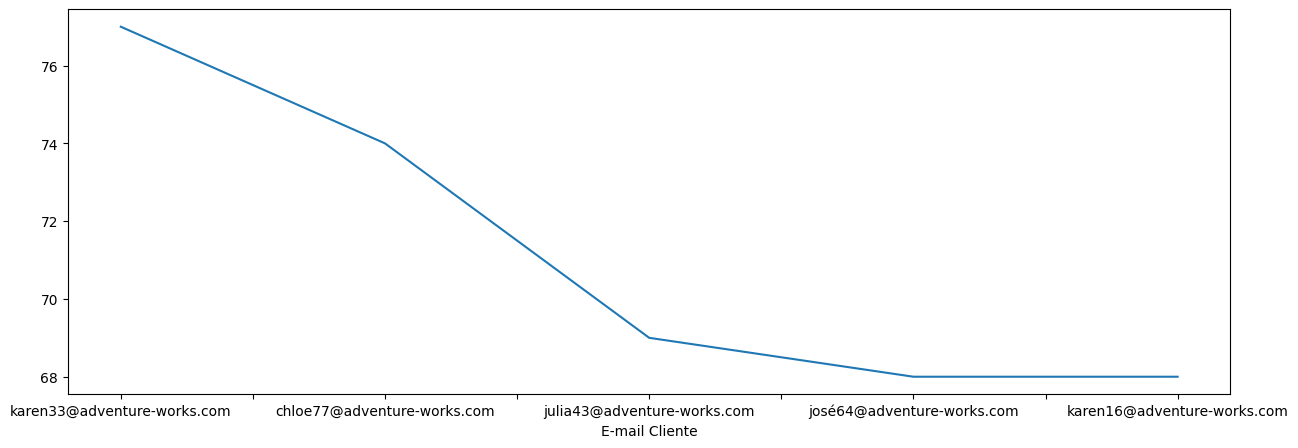

In [43]:
#Qual cliente comprou mais vezes
freq_clientes = vendas_df['E-mail Cliente'].value_counts()
display(freq_clientes)

freq_clientes[:5].plot(figsize=(15,5))

In [44]:
##Lojas que mais venderam em quantidade.
vendas_por_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_por_lojas = vendas_por_lojas[['Quantidade Vendida']]
display(vendas_por_lojas)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176


<Axes: xlabel='Nome da Loja'>

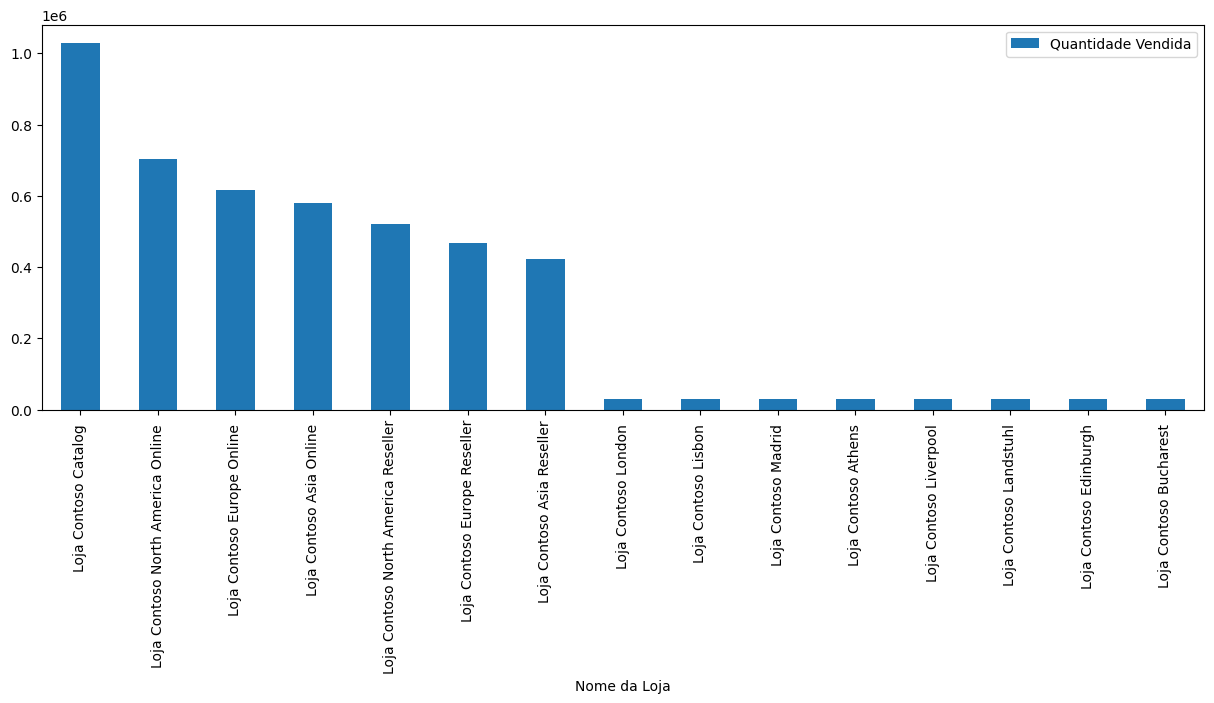

In [54]:
vendas_por_lojas = vendas_por_lojas.sort_values('Quantidade Vendida',ascending=False)
display(vendas_por_lojas[:5])

vendas_por_lojas[:15].plot(figsize=(15,5),kind='bar')

In [58]:
maior_valor = vendas_por_lojas['Quantidade Vendida'].max()
maior_loja = vendas_por_lojas['Quantidade Vendida'].idxmax()
print(maior_loja)
print(maior_valor)
print(vendas_por_lojas[:1])

Loja Contoso Catalog 
1029117
                       Quantidade Vendida
Nome da Loja                             
Loja Contoso Catalog              1029117


# Filtrando um Dataframe


In [62]:
#Qual o % de vendas que foi devolvido.

qtd_vendida = vendas_df['Quantidade Vendida'].sum()
qtd_devolvida= vendas_df['Quantidade Devolvida'].sum()

print(f'{(qtd_devolvida/qtd_vendida):.2%}')

1.17%


In [63]:
vendas_df.head()

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,Primeiro Nome,E-mail Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,Rurik,rbrumfieldmy@ameblo.jp
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,Cornelle,cshawd4@technorati.com
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,Kermit,kgorriekd@bandcamp.com
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,Angela,angela49@adventure-works.com
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,Jacob,jacob4@adventure-works.com


In [65]:
#Filtrando apenas a "Loja Contoso Europe Online".

vendas_loja_ContosoEurope = vendas_df[vendas_df['ID Loja'] == 306]
qtd_vendida = vendas_loja_ContosoEurope['Quantidade Vendida'].sum()
qtd_devolvida= vendas_loja_ContosoEurope['Quantidade Devolvida'].sum()

print(f'{(qtd_devolvida/qtd_vendida):.2%}')

1.33%


In [66]:
loja306 = vendas_df['ID Loja'] == 306
display(loja306)

0         False
1         False
2         False
3         False
4         False
          ...  
980637    False
980638    False
980639    False
980640    False
980641    False
Name: ID Loja, Length: 980642, dtype: bool

In [73]:
#Desafio:
loja306 = (vendas_df['ID Loja'] == 306) & (vendas_df['Quantidade Devolvida'] == 0) 


vendas_loja_ContosoEurope = vendas_df[loja306]

vendas_loja_ContosoEurope

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,Primeiro Nome,E-mail Cliente
98,99,01/01/2017,03/01/2017,2,306,1269,10,26238,8,0,Contoso Carrying Case E312 Blue,Loja Contoso Europe Online,Edward,edward17@adventure-works.com
165,166,01/01/2017,02/01/2017,1,306,1107,10,7242,16,0,"Contoso SLR Camera 35"" M358 Orange",Loja Contoso Europe Online,Kellina,khanhard6r@taobao.com
166,167,01/01/2017,05/01/2017,4,306,242,10,34277,16,0,Contoso Home Theater System 7.1 Channel M1700 ...,Loja Contoso Europe Online,Marshall,marshall24@adventure-works.com
186,187,01/01/2017,06/01/2017,5,306,1479,10,23132,8,0,The Phone Company Smart phones Unlocked Intern...,Loja Contoso Europe Online,Cynthia,cynthia4@adventure-works.com
198,199,01/01/2017,03/01/2017,2,306,819,10,5363,4,0,Contoso Laptop Cooling Hub notebook fan with 4...,Loja Contoso Europe Online,Shaine,svirgoea4@blogtalkradio.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980579,980580,31/12/2017,06/01/2018,6,306,771,10,6539,8,0,Contoso USB Wave Multi-media Keyboard E280 Black,Loja Contoso Europe Online,Hasty,hgauntleyf0@smh.com.au
980580,980581,31/12/2017,01/01/2018,1,306,591,10,32061,8,0,Contoso Projector 480p M480 White,Loja Contoso Europe Online,Gina,gina18@adventure-works.com
980581,980582,31/12/2017,31/12/2017,0,306,1388,10,22838,8,0,Contoso Private Branch Exchange M88 Grey,Loja Contoso Europe Online,Alexa,alexa14@adventure-works.com
980582,980583,31/12/2017,03/01/2018,3,306,1354,10,33450,8,0,Contoso Hybrid system M60 White,Loja Contoso Europe Online,Alexis,alexis3@adventure-works.com


## Adicionando Colunas


In [74]:
vendas_df.head()

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,Primeiro Nome,E-mail Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,Rurik,rbrumfieldmy@ameblo.jp
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,Cornelle,cshawd4@technorati.com
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,Kermit,kgorriekd@bandcamp.com
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,Angela,angela49@adventure-works.com
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,Jacob,jacob4@adventure-works.com


In [75]:
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980642 entries, 0 to 980641
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Numero da Venda       980642 non-null  int64 
 1   Data da Venda         980642 non-null  object
 2   Data do Envio         980642 non-null  object
 3   ID Canal              980642 non-null  int64 
 4   ID Loja               980642 non-null  int64 
 5   ID Produto            980642 non-null  int64 
 6   ID Promocao           980642 non-null  int64 
 7   ID Cliente            980642 non-null  int64 
 8   Quantidade Vendida    980642 non-null  int64 
 9   Quantidade Devolvida  980642 non-null  int64 
 10  Nome do Produto       980642 non-null  object
 11  Nome da Loja          980642 non-null  object
 12  Primeiro Nome         980642 non-null  object
 13  E-mail Cliente        980642 non-null  object
dtypes: int64(8), object(6)
memory usage: 104.7+ MB


In [76]:
#Acrescentar coluna de Ano,Mes e dia

vendas_df['Data da Venda'] = pd.to_datetime(vendas_df['Data da Venda'],format='%d/%m/%Y')
vendas_df.info()
display(vendas_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980642 entries, 0 to 980641
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Numero da Venda       980642 non-null  int64         
 1   Data da Venda         980642 non-null  datetime64[ns]
 2   Data do Envio         980642 non-null  object        
 3   ID Canal              980642 non-null  int64         
 4   ID Loja               980642 non-null  int64         
 5   ID Produto            980642 non-null  int64         
 6   ID Promocao           980642 non-null  int64         
 7   ID Cliente            980642 non-null  int64         
 8   Quantidade Vendida    980642 non-null  int64         
 9   Quantidade Devolvida  980642 non-null  int64         
 10  Nome do Produto       980642 non-null  object        
 11  Nome da Loja          980642 non-null  object        
 12  Primeiro Nome         980642 non-null  object        
 13 

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,Primeiro Nome,E-mail Cliente
0,1,2017-01-01,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,Rurik,rbrumfieldmy@ameblo.jp
1,2,2017-01-01,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,Cornelle,cshawd4@technorati.com
2,3,2017-01-01,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,Kermit,kgorriekd@bandcamp.com
3,4,2017-01-01,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,Angela,angela49@adventure-works.com
4,5,2017-01-01,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,Jacob,jacob4@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,2017-12-31,31/12/2017,0,194,2490,4,10353,120,0,Contoso Rubberized Skin BlackBerry E100 White,Loja Contoso Ridgely,Orion,ocrosson9u@illinois.edu
980638,980639,2017-12-31,06/01/2018,6,32,2488,4,31750,120,0,Contoso Rubberized Skin BlackBerry E100 Black,Loja Contoso Milliken,Victor,victor11@adventure-works.com
980639,980640,2017-12-31,03/01/2018,3,210,2511,10,12003,80,0,Contoso Original K1m Li-Ion Standard Battery E...,Loja Contoso Cheshire,Myrtle,mtopaz4@gmpg.org
980640,980641,2017-12-31,31/12/2017,0,53,436,4,25550,39,0,Adventure Works Desktop PC1.80 ED180 White,Loja Contoso East Troy,Lance,lance5@adventure-works.com


In [77]:
vendas_df['Ano da Venda'] = vendas_df['Data da Venda'].dt.year
vendas_df['Mês da Venda'] = vendas_df['Data da Venda'].dt.month
vendas_df['Dia da Venda'] = vendas_df['Data da Venda'].dt.day
display(vendas_df)
vendas_df.info()

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,Primeiro Nome,E-mail Cliente,Ano da Venda,Mês da Venda,Dia da Venda
0,1,2017-01-01,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,Rurik,rbrumfieldmy@ameblo.jp,2017,1,1
1,2,2017-01-01,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,Cornelle,cshawd4@technorati.com,2017,1,1
2,3,2017-01-01,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,Kermit,kgorriekd@bandcamp.com,2017,1,1
3,4,2017-01-01,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,Angela,angela49@adventure-works.com,2017,1,1
4,5,2017-01-01,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,Jacob,jacob4@adventure-works.com,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,2017-12-31,31/12/2017,0,194,2490,4,10353,120,0,Contoso Rubberized Skin BlackBerry E100 White,Loja Contoso Ridgely,Orion,ocrosson9u@illinois.edu,2017,12,31
980638,980639,2017-12-31,06/01/2018,6,32,2488,4,31750,120,0,Contoso Rubberized Skin BlackBerry E100 Black,Loja Contoso Milliken,Victor,victor11@adventure-works.com,2017,12,31
980639,980640,2017-12-31,03/01/2018,3,210,2511,10,12003,80,0,Contoso Original K1m Li-Ion Standard Battery E...,Loja Contoso Cheshire,Myrtle,mtopaz4@gmpg.org,2017,12,31
980640,980641,2017-12-31,31/12/2017,0,53,436,4,25550,39,0,Adventure Works Desktop PC1.80 ED180 White,Loja Contoso East Troy,Lance,lance5@adventure-works.com,2017,12,31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980642 entries, 0 to 980641
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Numero da Venda       980642 non-null  int64         
 1   Data da Venda         980642 non-null  datetime64[ns]
 2   Data do Envio         980642 non-null  object        
 3   ID Canal              980642 non-null  int64         
 4   ID Loja               980642 non-null  int64         
 5   ID Produto            980642 non-null  int64         
 6   ID Promocao           980642 non-null  int64         
 7   ID Cliente            980642 non-null  int64         
 8   Quantidade Vendida    980642 non-null  int64         
 9   Quantidade Devolvida  980642 non-null  int64         
 10  Nome do Produto       980642 non-null  object        
 11  Nome da Loja          980642 non-null  object        
 12  Primeiro Nome         980642 non-null  object        
 13 

# Modificando e consultando valores

In [92]:
novos_produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv',sep=';')
novos_produtos_df.head()

,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22


In [93]:
novos_produtos_df = novos_produtos_df.set_index('Nome do Produto')
novos_produtos_df.head()

,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
Nome do Produto,,,,,,,,
Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22


In [90]:
#Loc serve para especificar qual o valor a ser pesquisado
print(novos_produtos_df.loc['Contoso Optical Wheel OEM PS/2 Mouse E60 Black','Preco Unitario'])

#iloc
print(novos_produtos_df.iloc[2,5])

13
13


In [95]:
#novos_produtos_df.loc['Contoso Wireless Laser Mouse E50 Grey','Preco Unitario'] = 23
novos_produtos_df.loc[novos_produtos_df['ID Produto']==873,'Preco Unitario'] = 23
novos_produtos_df.head()

,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
Nome do Produto,,,,,,,,
Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69",23,873,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22


In [97]:
#novos_produtos_df.to_csv('produtos2.csv')
vendas_df.to_csv('Novo Vendas 2017.csv',sep=";")